# Multiple Linear Regression Modeling On Data From Housing Company Surprise Housing

#### 

**Business Problem**:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
   - Which variables are significant in predicting the price of a house, and
   - How well those variables describe theprice of a house

Also, determine the optimal value of lambda for ridge and lasso regression.

#### 
**Data Description:** 

The company has provided the data in a CSV file. The data is from sale of houses in Australia. There are 81 columns containing various drivers behind the selling price of a house. The last column is the selling price (target variable). 

#### 
**Structure of the Analysis**:

The analysis will follow the below outlined rough structure. 

**1. Reading & Understanding The Data (EDA)**
   - Data volume & general spread
   - Check what level the data is at (primary keys)
   - Columns and their data types
   - Numeric vs Categorical Columns
   - Data cleaning and treatment
   - Remove irrelevant/incorrect columns, fix bad formats
   - Missing value treatment
   - Outliers
   - Univariate/Biavariate Analysis
   - Correlations
   - Derived Metrics
   
**2. Data Preparation For Model Building**

**3. Model Development**
   - Basic Linear Regression model using SKLearn
   - Ridge regularization model with hyperparameter tuning
   - Lasso regularization model with hyperparameter tuning
  
**4. Model Evaluation**

## Step 1: Reading and Understanding the Data

Let us first import the required packages, read the data, and get some high-level understanding of it.

In [185]:
# Load the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [186]:
# Import the data
house = pd.read_csv("train.csv")
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [187]:
# Size of the dataset
house.shape

(1460, 81)

Let's set these options as there are large number of columns so there will be no condensing of outputs -

In [188]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [190]:
# Contents of the data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The data has 1460 records and 81 columns. Let's check the overall level of the data - based on the column values, only the Id column has completely unique information.

In [191]:
# Checking the level (primary keys) of the data.
print(len(house))
print(house['Id'].nunique())

1460
1460


### Categorical and numerical columns
We need to identify categorical & numerical columns for separate analysis and modeling.  Using the data dictionary and eye-balling through the data, below is the list of numerical columns we found. Everything else will be categorical.

We have kept some 'year' type columns also as numerical as we intend to convert them to 'age' later and use as discrete numerical variables.

In [192]:
num_vars = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
            'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
            'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
            'PoolArea','MiscVal','YrSold','SalePrice']

### Dropping useless data

In [194]:
# Drop duplicates
print(house.shape)
house2 = house.drop_duplicates()
print(house2.shape)

(1460, 81)
(1460, 81)


There were no duplicate records so nothing was dropped.

Now, we will drop incorrect or irrelevant columns.

In [195]:
# Dropping the first column as it is an Id and not useful to the modeling process
house2 = house2.drop(['Id'],axis=1)
house2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing value treatment

In [196]:
# Missing value percentage in each column
round(house2.isnull().sum()/len(house2),3)*100

MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.7
LotArea           0.0
Street            0.0
Alley            93.8
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
YearBuilt         0.0
YearRemodAdd      0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType       59.7
MasVnrArea        0.5
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          2.5
BsmtCond          2.5
BsmtExposure      2.6
BsmtFinType1      2.5
BsmtFinSF1        0.0
BsmtFinType2      2.6
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
Heating           0.0
HeatingQC         0.0
CentralAir        0.0
Electrical        0.1
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFinSF      0.0
GrLivArea 

Many columns have missing values and they are typically either low (up to 2.6%) or very high. We will drop all columns with high missing values (using a threshold of 15%).

In [197]:
drop_cols = house2.columns[100*(house2.isnull().sum()/len(house2)) > 15]
print("Number of columns with high missing values = ",len(drop_cols))
print("\n List of columns to drop ->\n")
print(drop_cols)

Number of columns with high missing values =  7

 List of columns to drop ->

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [198]:
# Dropping these columns
house2 = house2.drop(drop_cols,axis=1)
print(house2.shape)

(1460, 73)


In [200]:
# Rechecking missing value percentage in each column
round(house2.isnull().sum()/len(house2),3)*100

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrArea       0.5
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         2.5
BsmtCond         2.5
BsmtExposure     2.6
BsmtFinType1     2.5
BsmtFinSF1       0.0
BsmtFinType2     2.6
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.1
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr 

We checked some sample rows with missing values for both the basement related & garage related variables and didn't find any format issues or data shifting across columns.So we will proceed with usual missing value treatment.

In [202]:
# Most of the variables are categorical so let's check their distributions and modes.
print(house2['BsmtQual'].value_counts())
print(house2['BsmtCond'].value_counts())
print(house2['BsmtExposure'].value_counts())
print(house2['BsmtFinType1'].value_counts())
print(house2['BsmtFinType2'].value_counts())
print(house2['Electrical'].value_counts())
print(house2['GarageType'].value_counts())
print(house2['GarageYrBlt'].value_counts())
print(house2['GarageFinish'].value_counts())
print(house2['GarageQual'].value_counts())
print(house2['GarageCond'].value_counts())

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0

In [203]:
# Imputing missing values with mode for categorical columns
house2['BsmtQual'] = house2['BsmtQual'].fillna(house2['BsmtQual'].mode()[0])
house2['BsmtCond'] = house2['BsmtCond'].fillna(house2['BsmtCond'].mode()[0])
house2['BsmtExposure'] = house2['BsmtExposure'].fillna(house2['BsmtExposure'].mode()[0])
house2['BsmtFinType1'] = house2['BsmtFinType1'].fillna(house2['BsmtFinType1'].mode()[0])
house2['BsmtFinType2'] = house2['BsmtFinType2'].fillna(house2['BsmtFinType2'].mode()[0])
house2['Electrical'] = house2['Electrical'].fillna(house2['Electrical'].mode()[0])
house2['GarageType'] = house2['GarageType'].fillna(house2['GarageType'].mode()[0])
house2['GarageYrBlt'] = house2['GarageYrBlt'].fillna(house2['GarageYrBlt'].mode()[0])
house2['GarageFinish'] = house2['GarageFinish'].fillna(house2['GarageFinish'].mode()[0])
house2['GarageQual'] = house2['GarageQual'].fillna(house2['GarageQual'].mode()[0])
house2['GarageCond'] = house2['GarageCond'].fillna(house2['GarageCond'].mode()[0])

In [204]:
# Double checking to confirm
print(house2['BsmtQual'].value_counts())
print(house2['BsmtCond'].value_counts())
print(house2['BsmtExposure'].value_counts())
print(house2['BsmtFinType1'].value_counts())
print(house2['BsmtFinType2'].value_counts())
print(house2['Electrical'].value_counts())
print(house2['GarageType'].value_counts())
print(house2['GarageYrBlt'].value_counts())
print(house2['GarageFinish'].value_counts())
print(house2['GarageQual'].value_counts())
print(house2['GarageCond'].value_counts())

BsmtQual
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1348
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinType2
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageYrBlt
2005.0    146
2006.0     59
2004.0     53
2003.0     50
2007.0     49
1977.0     35
1998.0     31
1999.0     30
1976.0     29
2008.0     29
2000.0     27
1968.0     26
2002.0     26
1950.0     24
1993.0     22
1958.0     21
1966.0     21
2009.0     21
1962.0     21
1965.0     21
1970.0     20
1996.0     

In [205]:
# Now 'MasVnrArea' is a numerical column so let's check our it's distribution
house2['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Although the mean and median are very different, but observe that the minimum = median = 0. Which means more than half of the values are zeros.

In [206]:
# Hence, imputing with zero
house2['MasVnrArea'] = house2['MasVnrArea'].fillna(0)

In [207]:
# Checking actual count of mising to ensure we didn't miss any small percentages of missing
print(house2.isnull().sum())
print("\n")
print(house2.shape)

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

Now we have got 73 columns left out of which 72 are features and 1 is the target variable.

### We looked at each of the columns and didn't find any junk columns, incorrect formats, or incorrect data.

### Derived metrics creation

We are going to convert all the year related variables into age variables so we can treat them as numeric variables. This will help with understanding as well as modeling.

In [208]:
print("Minimum and maximum values of Year variables to estimate range:")
print(house2['YearBuilt'].min(),house2['YearBuilt'].max())
print(house2['YearRemodAdd'].min(),house2['YearRemodAdd'].max())
print(house2['GarageYrBlt'].min(),house2['GarageYrBlt'].max())
print(house2['YrSold'].min(),house2['YrSold'].max())

Minimum and maximum values of Year variables to estimate range:
1872 2010
1950 2010
1900.0 2010.0
2006 2010


In [209]:
# The maximum values are 2010 in all 4 cases so let's subtract from 2010 to get age
house2['AgeBuilt'] = 2010 - house2['YearBuilt']
house2['AgeRemodAdd'] = 2010 - house2['YearRemodAdd']
house2['GarageAgeBlt'] = 2010 - house2['GarageYrBlt']
house2['AgeSold'] = 2010 - house2['YrSold']

print("Minimum and maximum values of Age variables to confirm:")
print(house2['AgeBuilt'].min(),house2['AgeBuilt'].max())
print(house2['AgeRemodAdd'].min(),house2['AgeRemodAdd'].max())
print(house2['GarageAgeBlt'].min(),house2['GarageAgeBlt'].max())
print(house2['AgeSold'].min(),house2['AgeSold'].max())

# Dropping the Year variables
house2 = house2.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)
print("\n")
print(house2.shape)

Minimum and maximum values of Age variables to confirm:
0 138
0 60
0.0 110.0
0 4


(1460, 73)


### Let's look at the columns one by one now. We want to fully understand the values of each column as well as perform -
- Sanity Checks
- Outlier Detection

#### Numerical variables first -

In [210]:
# Revised list after removing any columns we have dropped earlier
num_vars = ['LotArea','AgeBuilt','AgeRemodAdd','MasVnrArea','BsmtFinSF1',
            'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
            'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageAgeBlt','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
            'PoolArea','MiscVal','AgeSold','SalePrice']

In [211]:
# Checking distributions & outliers
house2[num_vars].describe()

,LotArea,AgeBuilt,AgeRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageAgeBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,38.732192,25.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,30.023973,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2.184247,180921.195890
std,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,10.000000,6.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,7.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,129975.000000
50%,9478.500000,37.000000,16.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,25.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,163000.000000
75%,11601.500000,56.000000,43.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,48.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,214000.000000
max,215245.000000,138.000000,60.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,110.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,4.000000,755000.000000


Let's check the spread and distribution of the target variable separately

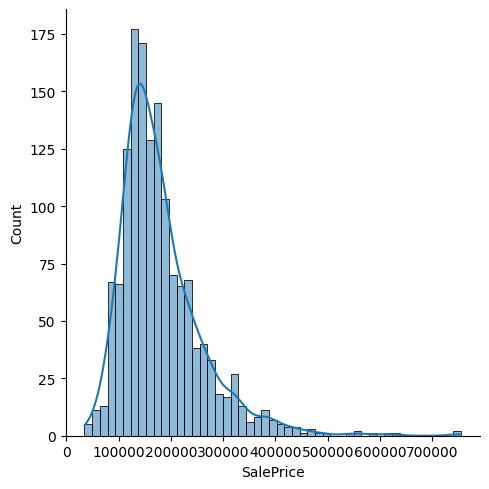

In [54]:
sns.displot(house2['SalePrice'],kde=True)
plt.show()

#### Important note - 
There are many columns with predominantly a single value (example zeros). We are not doing any treatment at this time. We will let the modelling process take care of these via feature importance & selection.

Now, since there are a large number of features, we will split them into two groups for performing the pairplot and correlations exercise. the target variable is present in both these groups. Splitting is not necessarily the best idea but we have to do it to make sense of the results. It will anyway point us towards the relationships between variables.

In [212]:
num_vars1 = ['LotArea','AgeBuilt','AgeRemodAdd','MasVnrArea','BsmtFinSF1',
            'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']
num_vars2 = ['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageAgeBlt',
             'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
             'ScreenPorch','PoolArea','MiscVal','AgeSold','SalePrice']

#### Open the below plots in a separate window and magnify to read the results.

In [ ]:
# Pairplot for group 1
sns.pairplot(house2[num_vars1])
plt.show()

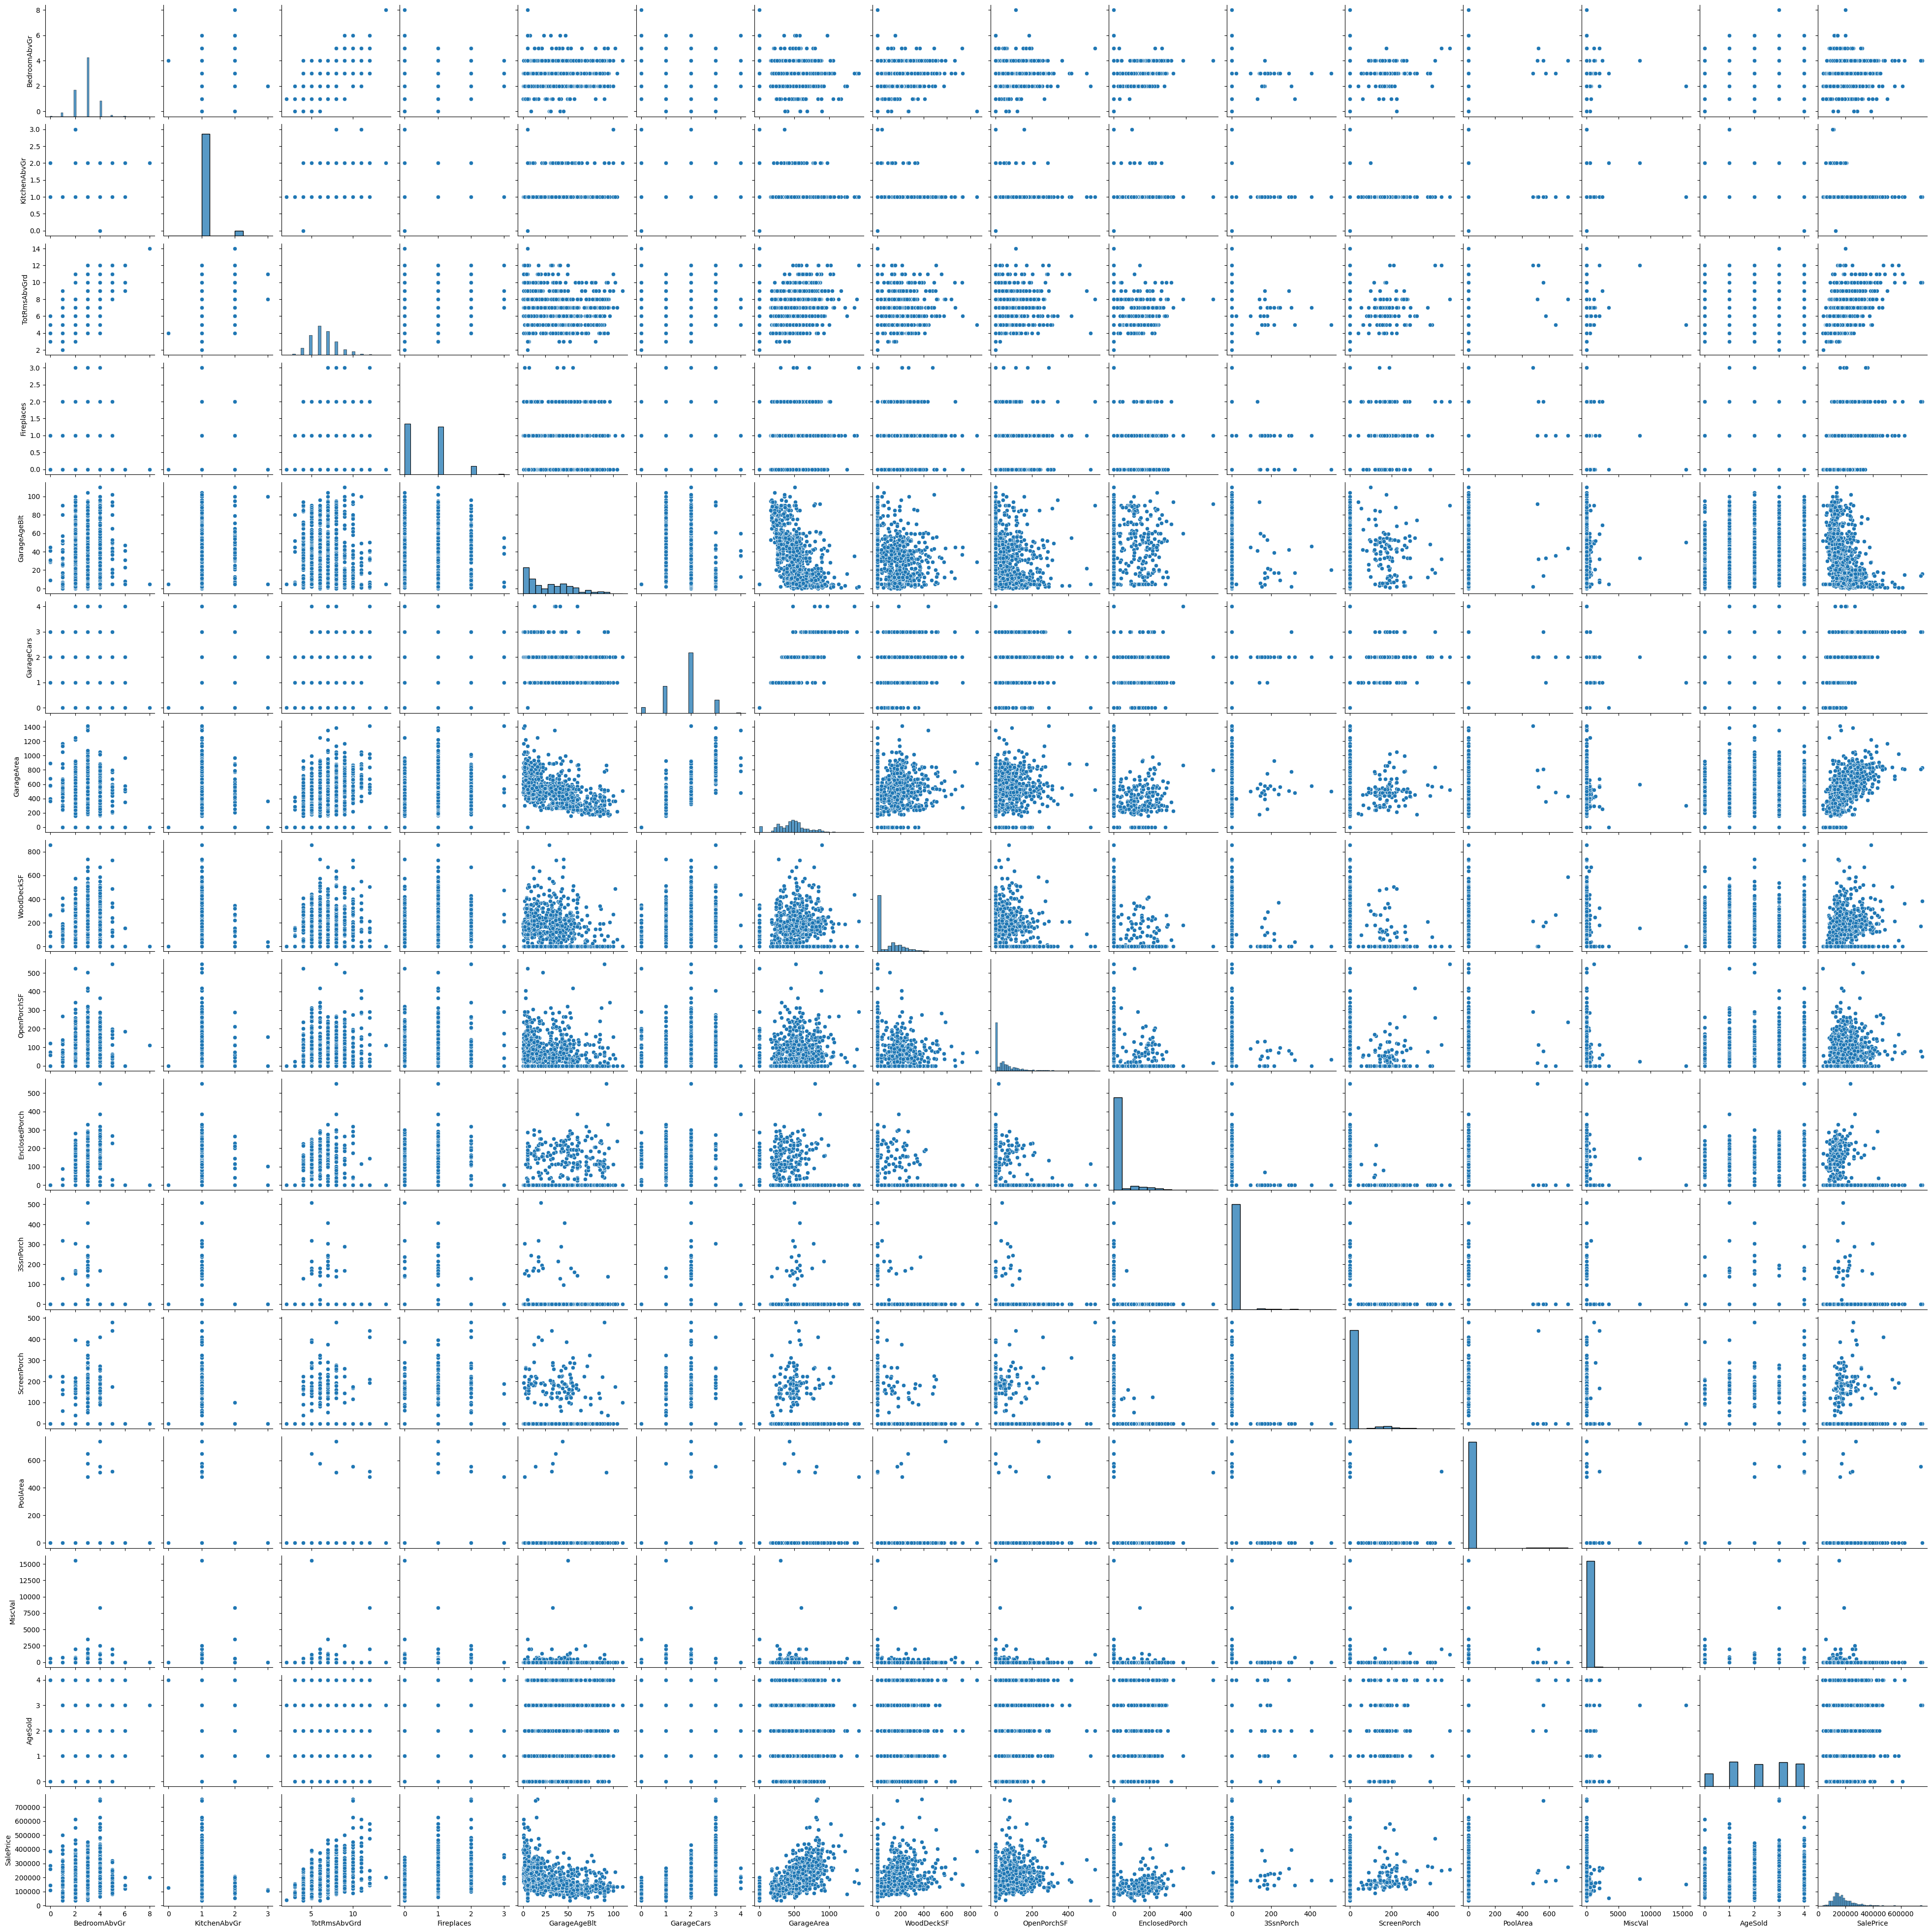

In [215]:
# Pairplot for group 2
sns.pairplot(house2[num_vars2])
plt.show()

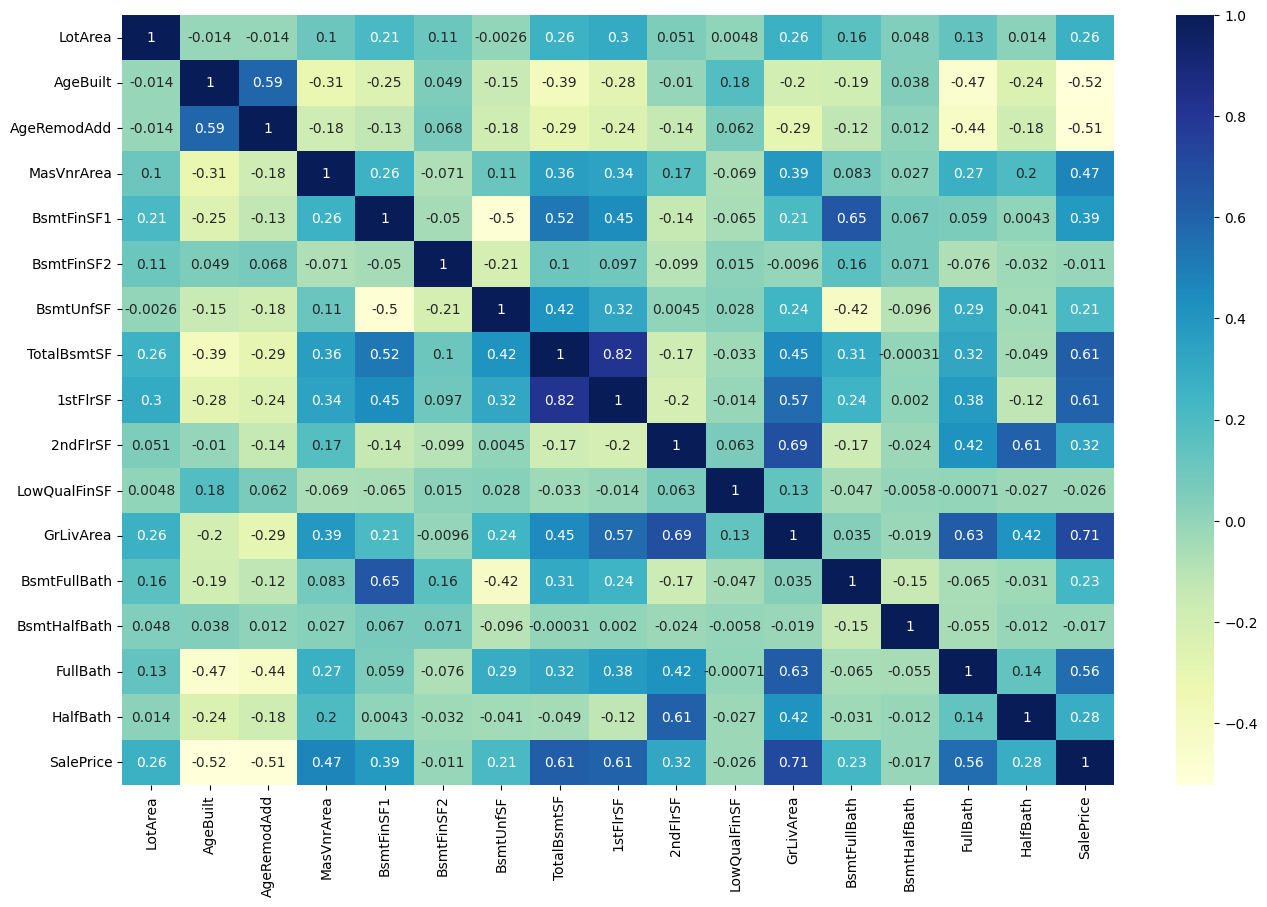

In [216]:
# Correlation heatmap for group 1
plt.figure(figsize = (16, 10))
sns.heatmap(house2[num_vars1].corr(),cmap="YlGnBu",annot = True)
plt.show()

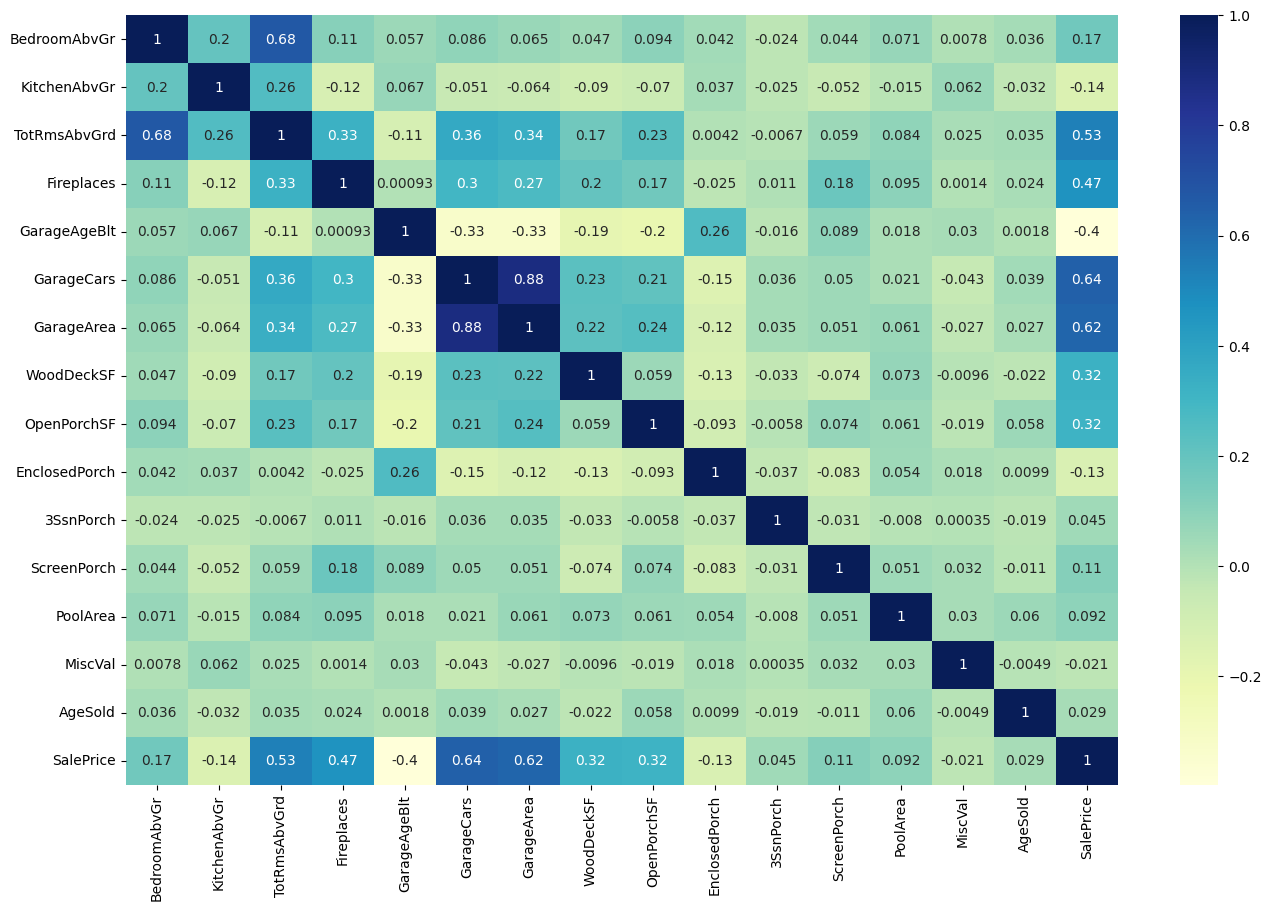

In [217]:
# Correlation heatmap for group 2
plt.figure(figsize = (16, 10))
sns.heatmap(house2[num_vars2].corr(),cmap="YlGnBu",annot = True)
plt.show()

#### Key learnings -
- Linear relationships exist between the target variable and many predictor variables.
- The target variable has moderate to high correlation with many predictor variables.
- As expected, many of the predictors are highly correlated and some of them will need to be removed.
- Hence, all things considered, it makes sense to develop a linear model with this data.

#### Reiterating - linear relationships exist between the target variable and many predictor variables. Hence, linear regression is a suitable model to choose for this data.

#### Also, we are not explicitly dealing with multi-collinearity now. We will utilize the regularization powers of our models to automatically remove insignificant predictors.

## Step 2: Data Preparation

There are no binary (Yes/No) columns in the data so we don't need to convert them to 1/0 type.

And we will retain the numerical columns as they are.

And convert the categorical columns to dummy variables.

We are not doing any value mapping or correction for the categorical columns. All columns seem to have corect values now. And we don't care about the individual values of such a large number of variables. So we will let them be as they are and convert to dummies.

In [218]:
house3 = house2.copy()

In [219]:
house3.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'Mo

In [220]:
house3.shape

(1460, 73)

In [221]:
house3

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,10,10,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,WD,Normal,175000,11,10,11.0,3
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,WD,Normal,210000,32,22,32.0,0
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,WD,Normal,266500,69,4,69.0,0
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,WD,Normal,142125,60,14,60.0,0


#### Convert categorical variables to dummy variables

In [126]:
cat_vars = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities',
            'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
            'HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st',
            'Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
            'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
            'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual',
            'GarageCond','PavedDrive','MoSold','SaleType','SaleCondition']

We are doing the following steps in the below for loop -
1. Converting all categorical columns to string type.
2. Appending the column name at the start of each value in that column. this is to make the final dummy variable easy to read and interpret.
3. Creating dummies.
4. Appending the dummies to the dataset.
5. Dropping the original column.

In [222]:
for col in cat_vars:
    house3[col] = house3[col].astype('str')
    house3[col] = col + "_" + house3[col]
    tmp = pd.get_dummies(house3[col],drop_first=True,dtype=int)
    house3 = pd.concat([house3,tmp],axis=1)
    house3 = house3.drop([col],axis=1)

In [223]:
house3.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

In [224]:
house3.shape

(1460, 267)

In [226]:
# Having a look to ensure things ran correctly
house3

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleTy

In [228]:
# Final check on datatypes to confirm that we are only left with numerical columns
house3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 267 entries, LotArea to SaleCondition_Partial
dtypes: float64(2), int64(265)
memory usage: 3.0 MB


#### Train-test split, scaling, and separating X & y variables

In [229]:
# Train-test split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(house3,train_size=0.7,test_size=0.3,random_state=100)

In [230]:
print(df_train.shape)
print(df_test.shape)

(1021, 267)
(438, 267)


In [231]:
# Scaling - using Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Using standard scaler because, in Ridge and Lasso, we need the features to be scaled and centered and the coeeficient of the intercept to be zero. Also, scaling all features including dummies so that it will be easy to compare model coefficients and determine feature importance.

In [232]:
# Scaling all columns including target variable
varlist = df_train.columns
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [233]:
df_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleTy

In [234]:
# Double checking
df_train[varlist].describe()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleTy

In [235]:
# Dividing into X and y sets for model building
y_train = df_train.pop('SalePrice')
X_train = df_train

Performing the above steps on test data to keep it handy for later

In [236]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [237]:
df_test.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleTy

In [238]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## Step 3: Model Development and Evaluation

### We will first use the basic linear regression model.

In [239]:
# Instantiate
reg = LinearRegression()

# Fit a line
reg.fit(X_train, y_train)

LinearRegression()

In [240]:
# Print the coefficients and intercept
print(reg.intercept_)
print(reg.coef_)

-0.00044027470131034204
[ 9.25666271e-02  2.30283031e-02 -1.60746425e+12 -5.90687478e+11
 -1.55121560e+12  1.58741737e+12 -2.55464881e+12 -2.79400191e+12
 -3.09425899e+11  3.41479115e+12  8.18961513e-03 -3.28244803e-03
  1.37654430e-02 -1.52556085e-02 -2.28504069e-02 -4.55928370e-02
 -1.80026922e-02  1.43182449e-02  2.48635883e-02  2.89946572e-02
  2.90472603e-03  2.17466388e-02  7.84546705e-03  1.86474628e-02
  1.44078834e-02  4.04632444e-02  1.06171348e-02 -1.73590883e-01
 -2.36067290e-02 -1.72821288e-02 -8.63698367e-04 -1.31435793e-03
 -5.39849384e-04  5.34635177e+11  9.64355469e-03  1.17187500e-02
  4.60815430e-03 -2.74658203e-03 -1.18923187e-03  2.75878906e-02
  1.80511475e-02 -3.72238159e-02 -2.31933594e-03 -1.11083984e-02
  2.84920932e+11  9.76867676e-02  6.35986328e-02  2.26928711e-01
  1.73080444e-01  2.14843750e-02  2.86865234e-03  8.02612305e-03
  4.02832031e-03 -7.70568848e-04 -4.27246094e-03  1.47705078e-02
 -3.11279297e-03  2.19116211e-02 -1.46179199e-02  7.06481934e-03
 

In [242]:
# Evaluation

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 on train dataset = ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 on test dataset = ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train dataset = ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test dataset = ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE on train dataset = ",mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE on test dataset = ",mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

R2 on train dataset =  0.9560145994314375
R2 on test dataset =  -7.803588953494572e+25
RSS on train dataset =  44.90909398050229
RSS on test dataset =  3.5196758574503347e+28
RMSE on train dataset =  0.20972696671759328
RMSE on test dataset =  8964256594320.604


### Now, Ridge Regression

We will do regularization via hyperparameter tuning using Grid-search cross validation with 5 folds. The hyperparameter is lambda (or alpha). If its value is too high it will lead to underfitting, if it is too low, it will not handle the overfitting.

In [243]:
# List of alphas to tune - 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
score_df = pd.DataFrame(model_cv.cv_results_)
score_df.head()

In [244]:
# Best estimator
model_cv.best_estimator_

Ridge(alpha=500)

In [245]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [246]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.58021131e-02  4.39721606e-02  2.80310797e-02  1.04865977e-02
  1.24177006e-02  4.44217083e-02  6.78460234e-02  6.15523894e-02
 -4.85304311e-03  1.00679246e-01  3.01460610e-02  2.13336037e-03
  5.34195443e-02  2.57001342e-02  7.44998737e-03 -2.51520251e-02
  5.18829829e-02  4.83281336e-02  5.61215441e-02  3.79355202e-02
  2.08974504e-02  1.25833774e-02  1.37126684e-03  1.52838102e-02
  1.65603279e-02 -3.46592982e-03  1.05966134e-03 -2.45209709e-02
 -3.77611313e-02 -9.89798141e-03  5.02482948e-03 -1.66759233e-02
 -6.73627610e-03 -1.25749666e-02  1.93244611e-02 -8.32040408e-03
  3.34374308e-03  2.39106549e-03  7.08419590e-03  1.03212391e-02
  1.02234298e-02  4.89835761e-03 -8.03996155e-03 -3.97454020e-03
 -1.00521952e-02  8.41940018e-03  3.39933094e-03  1.57205699e-02
 -1.04583786e-02  8.76495038e-03  6.10267002e-03 -2.65587510e-02
 -5.00143838e-03  1.32393800e-02  7.05016179e-03  1.83579798e-02
 -1.12159045e-02  2.54149000e-02 -1.39980431e-02 -3.88268737e-03
 -5.09726211e-03  8.71176

In [247]:
# Evaluation

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 on train dataset = ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 on test dataset = ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train dataset = ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test dataset = ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE on train dataset = ",mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE on test dataset = ",mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 on train dataset =  0.8948689208436822
R2 on test dataset =  0.8611089482480367
RSS on train dataset =  107.33883181860043
RSS on test dataset =  62.64444277890296
RMSE on train dataset =  0.324239231365234
RMSE on test dataset =  0.3781849309014912


### Now, Lasso Regression

We will do regularization via hyperparameter tuning using Grid-search cross validation with 5 folds. The hyperparameter is lambda (or alpha). If its value is too high it will lead to underfitting, if it is too low, it will not handle the overfitting.

In [248]:
# List of alphas to tune - 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [249]:
score_df = pd.DataFrame(model_cv.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.522800,0.114835,0.047415,0.020609,0.0001,{'alpha': 0.0001},-0.216953,-0.244050,-0.259554,-0.263115,-0.225162,-0.241767,0.018269,3,-0.138783,-0.137518,-0.139711,-0.141834,-0.134355,-0.138440,0.002482
1,0.299256,0.024767,0.121362,0.020130,0.001,{'alpha': 0.001},-0.197096,-0.239780,-0.243932,-0.241018,-0.206174,-0.225600,0.019823,2,-0.140818,-0.138308,-0.141606,-0.143224,-0.137381,-0.140268,0.002145
2,0.209114,0.056236,0.071444,0.016278,0.01,{'alpha': 0.01},-0.189591,-0.246124,-0.252416,-0.209432,-0.214508,-0.222414,0.023540,1,-0.182250,-0.159084,-0.179360,-0.179061,-0.181885,-0.176328,0.008717
3,0.099117,0.036279,0.039669,0.034054,0.05,{'alpha': 0.05},-0.213687,-0.284039,-0.266048,-0.236149,-0.244462,-0.248877,0.024294,4,-0.236523,-0.208181,-0.227634,-0.234719,-0.237207,-0.228853,0.010880
4,0.095909,0.050875,0.068125,0.034341,0.1,{'alpha': 0.1},-0.244978,-0.327689,-0.293684,-0.264401,-0.292588,-0.284668,0.028217,5,-0.281122,-0.250490,-0.269660,-0.277424,-0.282575,-0.272254,0.011767


In [250]:
model_cv.best_estimator_

Lasso(alpha=0.01)

In [251]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [252]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients which have been penalised

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [253]:
lasso.coef_

array([ 4.38205003e-02,  1.36860284e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.93694027e-03,  0.00000000e+00,  0.00000000e+00,
       -1.58781274e-02,  3.75302373e-01,  3.87494384e-02,  0.00000000e+00,
        3.44328004e-02,  4.04799058e-04, -0.00000000e+00, -5.69131244e-02,
        0.00000000e+00,  3.43874018e-02,  8.12894623e-02,  0.00000000e+00,
        4.27872211e-03,  0.00000000e+00,  0.00000000e+00,  9.59445158e-03,
        1.42543126e-02, -1.73697877e-02,  0.00000000e+00, -7.39832507e-02,
       -5.22943002e-02, -0.00000000e+00,  0.00000000e+00, -1.79347473e-02,
       -4.83569794e-04, -3.66561867e-03,  5.04037782e-02,  0.00000000e+00,
        3.73897919e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.55525924e-02,
       -0.00000000e+00,  5.86357713e-03,  0.00000000e+00, -2.82964224e-02,
       -0.00000000e+00,  

In [254]:
# Evaluation

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 on train dataset = ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 on test dataset = ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train dataset = ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test dataset = ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE on train dataset = ",mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE on test dataset = ",mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

R2 on train dataset =  0.9068528521160397
R2 on test dataset =  0.8433431689661322
RSS on train dataset =  95.10323798952345
RSS on test dataset =  70.65739487055683
RMSE on train dataset =  0.30520017674300304
RMSE on test dataset =  0.40164443619839324


### Evaluating the three models together

In [255]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.560146e-01,0.894869,0.906853
1,R2 Score (Test),-7.803589e+25,0.861109,0.843343
2,RSS (Train),4.490909e+01,107.338832,95.103238
3,RSS (Test),3.519676e+28,62.644443,70.657395
4,RMSE (Train),2.097270e-01,0.324239,0.305200
5,RMSE (Test),8.964257e+12,0.378185,0.401644



### Key Inferences from the above modeling exercise:
1. The above comparative evaluation table summarizes the performances of the 3 models.
2. the basic Linear Regression model is the worst here with highest overfitting. It has a train R2 of 0.95 while test R2 is a large negative value indicating very bad fit.
3. Both Ridge and Lasso are performing good and are pretty comparable in terms of Test R2, RSS, and RMSE values.
4. However, since Lasso has given a much simpler model by reducing a large number of coefficients to zero, we will select this as the final model.

### Residual Analysis & Predictions

Text(0.5, 0, 'Errors')

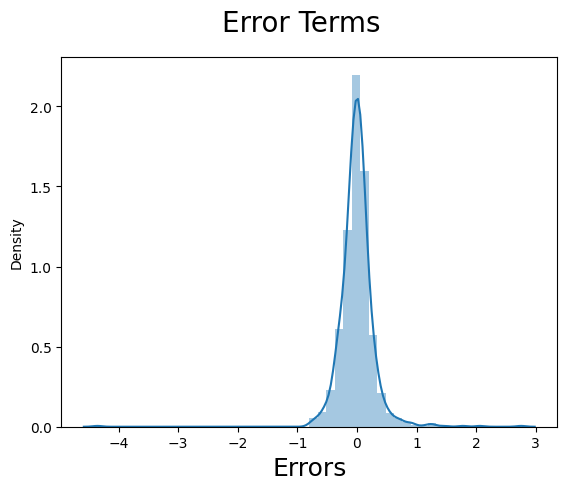

In [257]:
# Plot the histogram of the error terms using predictions from Lasso model.
fig = plt.figure()
sns.distplot((y_train - y_pred_train),bins=50)
fig.suptitle('Error Terms',fontsize=20)                  # Plot heading 
plt.xlabel('Errors',fontsize=18)                         # X-label

The error terms are approximately normally distributed with mean close to zero. This validates the assumptions of linear regression.

Let's plot the actual vs predicted graph using predictions from Lasso model.

Text(0, 0.5, 'y_pred_test')

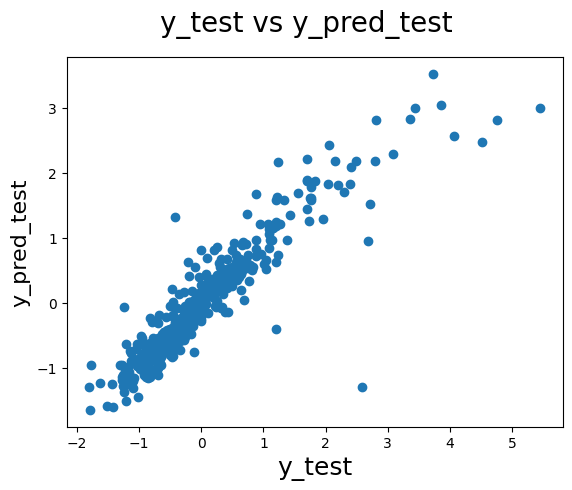

In [259]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)                          # Y-label

The actual vs predicted values on the test set are close, hence, our model is doing a good job.

### Comparison of coefficients from the three models.

In [261]:
betas = pd.DataFrame(index=X_train.columns)

In [262]:
betas.rows = X_train.columns

In [263]:
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [265]:
betas.shape

(266, 3)

In [264]:
betas.head()

,Linear,Ridge,Lasso
LotArea,9.256663e-02,0.035802,0.043821
MasVnrArea,2.302830e-02,0.043972,0.013686
BsmtFinSF1,-1.607464e+12,0.028031,0.000000
BsmtFinSF2,-5.906875e+11,0.010487,0.000000
BsmtUnfSF,-1.551216e+12,0.012418,0.000000


In [267]:
# Top five predictors as per Lasso model
betas.sort_values(by='Lasso',ascending=False).head()

,Linear,Ridge,Lasso
GrLivArea,3.414791e+12,0.100679,0.375302
OverallQual_10,-2.559153e+10,0.093269,0.162418
OverallQual_9,-3.530958e+10,0.086156,0.158653
OverallQual_8,-7.163219e+10,0.055794,0.133709
RoofMatl_WdShngl,6.411133e-01,0.061855,0.083598


### Further coding for the subjective questions.

#### Question 1
Let's double the optimal value of alpha and re-fit the two models

In [269]:
# Fitting Ridge model for alpha = 1000
alpha = 1000
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

Ridge(alpha=1000)

In [270]:
# Evaluation

y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 on train dataset = ",r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 on test dataset = ",r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train dataset = ",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test dataset = ",rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE on train dataset = ",mse_train_lr**0.5)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE on test dataset = ",mse_test_lr**0.5)
metric4.append(mse_test_lr**0.5)

R2 on train dataset =  0.8717483480046834
R2 on test dataset =  0.8508426349936856
RSS on train dataset =  130.94493668721827
RSS on test dataset =  67.2748884778888
RMSE on train dataset =  0.3581223980642884
RMSE on test dataset =  0.39191279105722826


In [271]:
# Fitting Lasso model for alpha = 0.02
alpha = 0.02
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.02)

In [272]:
# Evaluation

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 on train dataset = ",r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 on test dataset = ",r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train dataset = ",rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test dataset = ",rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE on train dataset = ",mse_train_lr**0.5)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE on test dataset = ",mse_test_lr**0.5)
metric5.append(mse_test_lr**0.5)

R2 on train dataset =  0.88610291481274
R2 on test dataset =  0.838384808392807
RSS on train dataset =  116.28892397619248
RSS on test dataset =  72.89377893774306
RMSE on train dataset =  0.3374864222265246
RMSE on test dataset =  0.4079511647561475


In [273]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric4, name = 'Ridge Regression')
ls_metric = pd.Series(metric5, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.560146e-01,0.871748,0.886103
1,R2 Score (Test),-7.803589e+25,0.850843,0.838385
2,RSS (Train),4.490909e+01,130.944937,116.288924
3,RSS (Test),3.519676e+28,67.274888,72.893779
4,RMSE (Train),2.097270e-01,0.358122,0.337486
5,RMSE (Test),8.964257e+12,0.391913,0.407951


In [276]:
# Comparison of coefficients
betas2 = pd.DataFrame(index=X_train.columns)

betas2.rows = X_train.columns

betas2['Linear'] = reg.coef_
betas2['Ridge'] = ridge2.coef_
betas2['Lasso'] = lasso2.coef_

print(betas2.shape)

(266, 3)


In [280]:
# Top five predictors as per Lasso model
betas2.sort_values(by='Ridge',ascending=False).head()[['Ridge']]

,Ridge
GrLivArea,0.083817
OverallQual_10,0.074443
OverallQual_9,0.070602
1stFlrSF,0.061885
Neighborhood_NoRidge,0.060966


In [281]:
# Top five predictors as per Lasso model
betas2.sort_values(by='Lasso',ascending=False).head()[['Lasso']]

,Lasso
GrLivArea,0.366185
OverallQual_9,0.163350
OverallQual_10,0.158847
OverallQual_8,0.127686
GarageCars,0.094736


#### Question 3
Let's drop the top 5 variables from the original Lasso model and re-fit.
We will have to do the entire regularization process again.

In [282]:
# Top five predictors as per the original Lasso model
betas.sort_values(by='Lasso',ascending=False).head()[['Lasso']]

,Lasso
GrLivArea,0.375302
OverallQual_10,0.162418
OverallQual_9,0.158653
OverallQual_8,0.133709
RoofMatl_WdShngl,0.083598


In [283]:
# Dropping these features
drop_cols = ['GrLivArea','OverallQual_10','OverallQual_9','OverallQual_8','RoofMatl_WdShngl']
X_train_new = X_train.drop(drop_cols,axis=1)
print(X_train.shape)
print(X_train_new.shape)
print("\n")
X_test_new = X_test.drop(drop_cols,axis=1)
print(X_test.shape)
print(X_test_new.shape)

(1021, 266)
(1021, 261)


(438, 266)
(438, 261)


In [284]:
# List of alphas to tune - 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso3 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso3, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [285]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [286]:
# Fitting Lasso model for alpha = 0.01
alpha = 0.01
lasso3 = Lasso(alpha=alpha)   
lasso3.fit(X_train_new, y_train)

Lasso(alpha=0.01)

In [287]:
# Evaluation

y_pred_train = lasso3.predict(X_train_new)
y_pred_test = lasso3.predict(X_test_new)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 on train dataset = ",r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 on test dataset = ",r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train dataset = ",rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test dataset = ",rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE on train dataset = ",mse_train_lr**0.5)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE on test dataset = ",mse_test_lr**0.5)
metric6.append(mse_test_lr**0.5)


R2 on train dataset =  0.8932386152727777
R2 on test dataset =  0.8342541890042399
RSS on train dataset =  109.00337380649398
RSS on test dataset =  74.75682444473966
RMSE on train dataset =  0.3267436070181363
RMSE on test dataset =  0.41313155456910355


In [288]:
# Comparison of coefficients
betas3 = pd.DataFrame(index=X_train_new.columns)
betas3.rows = X_train_new.columns
betas3['Lasso'] = lasso3.coef_

print(betas3.shape)

(261, 1)


In [289]:
# Top five predictors as per Lasso model
betas3.sort_values(by='Lasso',ascending=False).head()[['Lasso']]

,Lasso
2ndFlrSF,0.309217
1stFlrSF,0.267655
Neighborhood_NoRidge,0.103489
Neighborhood_NridgHt,0.089982
GarageCars,0.089755


In [290]:
betas3

,Lasso
LotArea,0.053302
MasVnrArea,0.033222
BsmtFinSF1,0.000000
BsmtFinSF2,0.000000
BsmtUnfSF,0.000000
TotalBsmtSF,0.045756
1stFlrSF,0.267655
2ndFlrSF,0.309217
LowQualFinSF,0.000000
BsmtFullBath,0.031901
